In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Mounting Google Drive
from  google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML DL Assignment and Quizzes/Deep Learning/DL Notes/data/ushape.csv')

In [ ]:
df.columns=["X","Y","class"]

In [ ]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


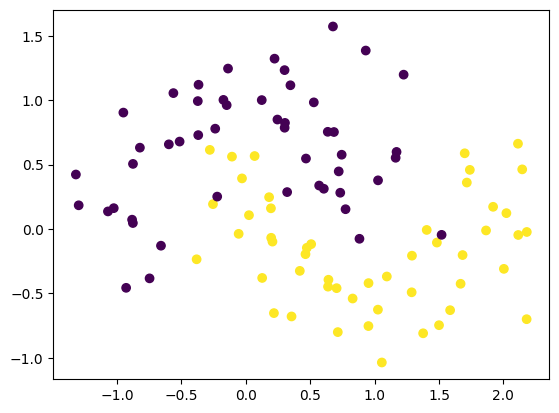

In [ ]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [ ]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

# He Initialization

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# To get the weights of the network via he_normal
model.get_weights()

[array([[-0.2738665 ,  0.41441786, -0.5029915 ,  0.2082308 , -1.3131262 ,
          0.6714275 ,  0.25908688,  0.23845008,  0.03084743, -1.7141021 ],
        [ 0.22876321, -0.93987226,  0.0686055 ,  1.1601743 ,  0.28016275,
          0.0028624 , -1.0290887 , -1.561518  ,  0.03235158,  0.95822763]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.2512466 , -0.60053736, -0.7588936 , -0.32804108,  0.06967198,
          0.00416668,  0.08781995,  0.62277114, -0.10479832,  0.03097152],
        [-0.94336015, -0.36550334, -0.19879122, -0.01355581,  0.7340005 ,
          0.11340059, -0.7373066 ,  0.0507659 , -0.8423128 ,  0.05237694],
        [ 0.38325313, -0.5954339 , -0.6833655 , -0.11401417, -0.57640916,
          0.9611247 , -0.10188802, -0.74327147,  0.2802417 ,  0.34674034],
        [ 0.03099196,  0.5500327 ,  0.15218627, -0.37335318,  0.67256325,
          0.07165246,  0.36707407, -0.23184164, -0.67305446,  0.05746778],
        [-0.35690

In [ ]:
# initial_weights = model.get_weights()

In [ ]:
# initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
# initial_weights[1] = np.zeros(model.get_weights()[1].shape)
# initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
# initial_weights[3] = np.zeros(model.get_weights()[3].shape)
# initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
# initial_weights[5] = np.zeros(model.get_weights()[5].shape)
# initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
# initial_weights[7] = np.zeros(model.get_weights()[7].shape)
# initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
# initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [ ]:
# model.set_weights(initial_weights)

In [ ]:
# model.get_weights()

[array([[-0.51682055, -0.09156119, -0.22682284,  0.3005647 , -0.13530107,
         -0.39114794,  0.35070744, -0.1390929 , -0.65749633,  0.6232721 ],
        [-0.6882992 , -0.39881524, -0.13500948, -1.0825987 ,  0.502611  ,
         -0.5785289 ,  0.22301786,  0.39504042, -0.13523617, -1.1856152 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.27784538, -0.220945  ,  0.3296307 ,  0.00253095, -0.29909426,
         -0.12862171,  0.66130334, -0.16518278, -0.12217209,  0.11715992],
        [-0.36436433,  0.17135073,  0.03744308, -0.34711975, -0.04535722,
         -0.00446832,  0.32691988,  0.01152875, -0.2799429 ,  0.40114012],
        [-0.1058424 ,  0.11378924,  0.13998313, -0.64533526, -0.10775379,
          0.06355675,  0.10539848, -0.6376163 , -0.198692  ,  0.7482024 ],
        [-0.22288252,  0.01883191,  0.3349381 , -0.22620408,  0.35960782,
         -0.00887117, -0.22778429, -0.00428014,  0.0082069 , -0.43489525],
        [ 0.14303

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 195ms/step - loss: 0.6718 - accuracy: 0.6962 - val_loss: 0.7029 - val_accuracy: 0.5500
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 0.6666 - accuracy: 0.6962 - val_loss: 0.6945 - val_accuracy: 0.5500
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 0.6608 - accuracy: 0.7089 - val_loss: 0.6867 - val_accuracy: 0.6000
Epoch 4/100
3/3 [==============================] - 0s 37ms/step - loss: 0.6558 - accuracy: 0.7089 - val_loss: 0.6786 - val_accuracy: 0.6000
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 0.6505 - accuracy: 0.7215 - val_loss: 0.6707 - val_accuracy: 0.6000
Epoch 6/100
3/3 [==============================] - 0s 35ms/step - loss: 0.6453 - accuracy: 0.7215 - val_loss: 0.6630 - val_accuracy: 0.5500
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: 0.6389 - accuracy: 0.7089 - val_loss: 0.6554 - val_accuracy: 0.5500
Epoch 8/100
3/3 [==

In [ ]:
model.get_weights()

[array([[-0.4269733 ,  0.4924153 , -0.7156242 ,  0.27714565, -1.129598  ,
          0.55646735,  0.44983616,  0.4331601 ,  0.21583465, -1.8812684 ],
        [ 0.1991717 , -0.7514196 ,  0.06826316,  1.3339441 ,  0.30750772,
         -0.23124991, -1.137615  , -1.6412841 , -0.06240699,  0.9849866 ]],
       dtype=float32),
 array([-0.06369325, -0.08011245, -0.02171804,  0.06541925,  0.11260301,
        -0.21907242,  0.14528456,  0.17902538,  0.13863659, -0.06959981],
       dtype=float32),
 array([[-2.17847615e-01, -6.67631269e-01, -6.67427540e-01,
         -4.05155689e-01,  1.20267063e-01,  2.44276505e-02,
          1.26923814e-01,  6.22771144e-01,  6.67810366e-02,
          1.88382044e-01],
        [-8.41444433e-01, -1.97291911e-01, -4.43992108e-01,
          1.71011448e-01,  4.86297995e-01,  1.67567132e-03,
         -9.86137509e-01,  5.07658981e-02, -9.48173940e-01,
         -8.49507973e-02],
        [ 4.63913053e-01, -6.94215119e-01, -7.52998710e-01,
         -2.35364765e-01, -5.51734

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

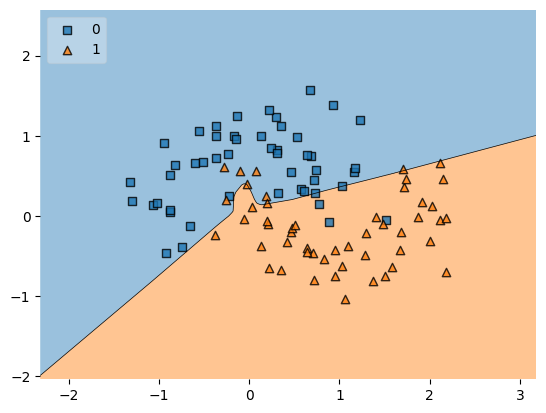

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# Glorot

In [ ]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                30        
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[ 0.13922359,  0.20441987, -0.73656845,  0.17333421, -0.47188026,
         -0.27483407, -0.24071987, -0.36383235,  0.05903406,  0.47581384],
        [-0.7780658 , -0.27014148, -0.37490845, -0.30857652, -0.40121755,
          0.01298146,  0.0209654 , -0.1544188 , -0.39214644, -0.07394935]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.18548124,  0.43076223,  0.10258188, -0.14752941, -0.0938917 ,
         -0.07618409,  0.0583362 ,  0.08327092, -0.41065738, -0.47737157],
        [-0.49175742,  0.4700276 , -0.1077307 , -0.3358252 , -0.391106  ,
         -0.20905551,  0.07769822, -0.12734385, -0.10566828,  0.14563869],
        [-0.22225569,  0.08962193,  0.31368908,  0.37162298, -0.27035674,
         -0.18083377,  0.01415393, -0.28822446, -0.2925332 ,  0.29503256],
        [ 0.05937358, -0.22373042,  0.42497614, -0.44059074, -0.5533831 ,
         -0.18851787, -0.51573384, -0.32524115,  0.072769  ,  0.4487241 ],
        [-0.45761

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 6s 250ms/step - loss: 0.6717 - accuracy: 0.5570 - val_loss: 0.6862 - val_accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 0s 70ms/step - loss: 0.6533 - accuracy: 0.6456 - val_loss: 0.6618 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 47ms/step - loss: 0.6345 - accuracy: 0.6835 - val_loss: 0.6389 - val_accuracy: 0.8000
Epoch 4/100
3/3 [==============================] - 0s 46ms/step - loss: 0.6177 - accuracy: 0.7342 - val_loss: 0.6163 - val_accuracy: 0.8000
Epoch 5/100
3/3 [==============================] - 0s 40ms/step - loss: 0.6030 - accuracy: 0.7468 - val_loss: 0.5945 - val_accuracy: 0.9000
Epoch 6/100
3/3 [==============================] - 0s 44ms/step - loss: 0.5887 - accuracy: 0.7595 - val_loss: 0.5738 - val_accuracy: 0.9000
Epoch 7/100
3/3 [==============================] - 0s 42ms/step - loss: 0.5745 - accuracy: 0.7848 - val_loss: 0.5542 - val_accuracy: 0.9000
Epoch 8/100
3/3 [==

9600/9600 [==============================] - 18s 2ms/step


<Axes: >

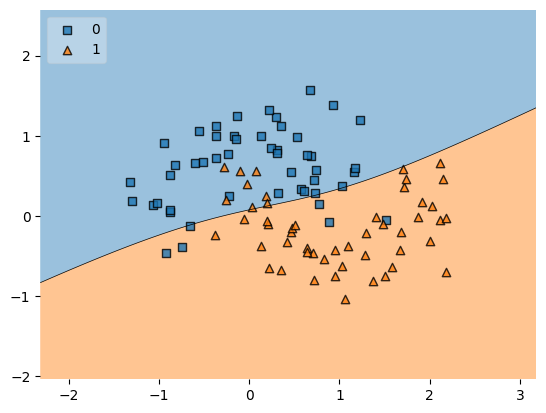

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)